<a href="https://colab.research.google.com/github/Legodork13/-Predicting-the-cost-of-a-car-based-on-its-characteristics/blob/main/Predicting_the_cost_of_a_car_based_on_its_characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('/content/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


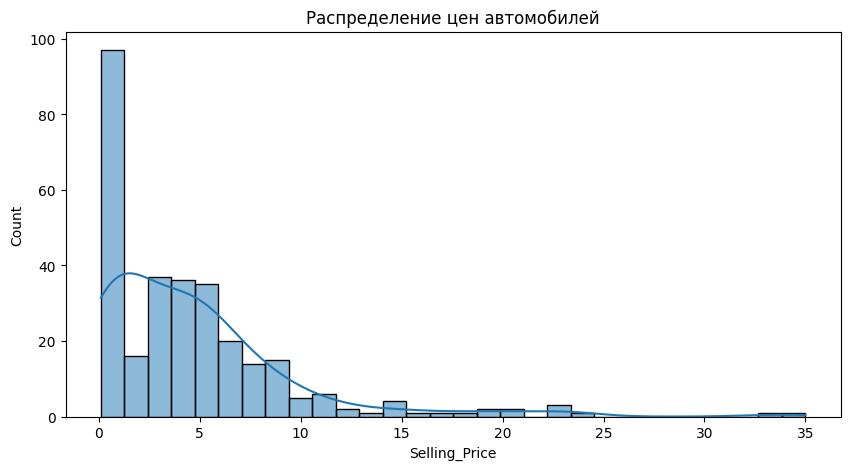

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("Распределение цен автомобилей")
plt.show()

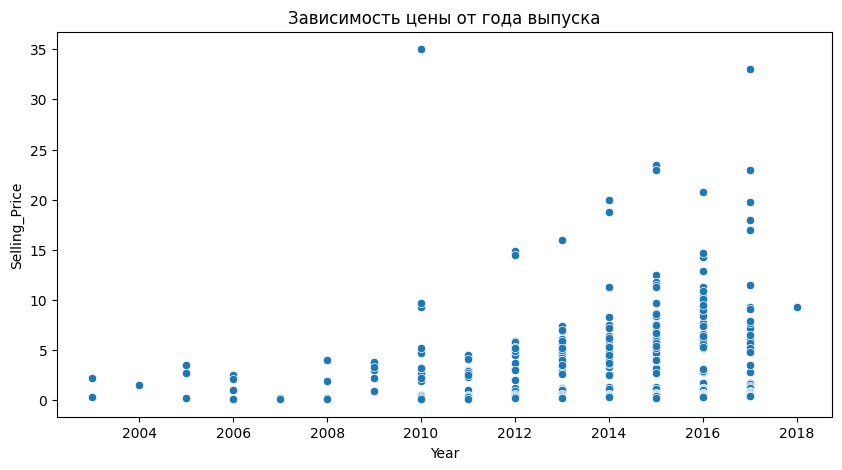

In [150]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Year', y='Selling_Price',data=df)
plt.title("Зависимость цены от года выпуска")
plt.show()

In [9]:
df = df.drop(['Car_Name'], axis=1)

In [65]:
X = df.drop('Selling_Price', axis=1)


In [97]:
Y = df['Selling_Price']

In [57]:
encoder=OneHotEncoder()
scaler=StandardScaler()

In [74]:
encoded=df[['Fuel_Type','Seller_Type','Transmission']]
scaled=df[['Year','Kms_Driven']]

In [40]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [77]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(encoded)
encoded_columns = encoder.get_feature_names_out(['Fuel_Type','Seller_Type','Transmission'])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)


In [78]:
scaled_columns=scaler.fit_transform(scaled)
scaled_df = pd.DataFrame(scaled_columns, columns=['Year','Kms_Driven'])

In [80]:
final_data = pd.concat([X, encoded_df, scaled_df], axis=1)

In [135]:
final_data

,Present_Price,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9.54,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,9.85,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,4.15,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,6.87,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
296,11.60,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,5.90,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
298,11.00,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
299,12.50,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [134]:
final_data=final_data.drop(['Kms_Driven'],axis=1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(final_data, Y, test_size=0.2,random_state=47)

In [137]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [144]:
# После получения предсказаний (y_pred) и истинных значений (y_test)
mae = mean_absolute_error(y_test, y_pred)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ".center(50))
print("="*50)
print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Это означает, что в среднем модель ошибается на ±{mae:.2f} единиц")

# Дополнительная интерпретация
if mae < 0.5:
    print("\n🔹 Отличный результат! Модель очень точная")
elif mae < 1.5:
    print("\n🔹 Хороший результат! Точность модели на приемлемом уровне")
else:
    print("\n🔹 Точность модели можно улучшить. Попробуйте:")
    print("   - Добавить больше данных")
    print("   - Настроить гиперпараметры модели")
    print("   - Проверить выбросы в данных")

print("\n" + "="*50)


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             

Средняя абсолютная ошибка (MAE): 1.49
Это означает, что в среднем модель ошибается на ±1.49 единиц

🔹 Хороший результат! Точность модели на приемлемом уровне

